Classification of Churn in Telecommunication Company

Introduction

[insert intro here, including hypothesis]

Method and Results

First, we begin by loading the libraries we will need to use. 

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(broom)
options(repr.matrix.max.rows=6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

Next, we read in the csv file, and select the columns that are required to build our predictor. We also select the target variable itself. Then, we filter out all the empty observations (NA values). Finally, we mutate the Churn variable into a factor.

In [2]:
telecom<-read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")|>
         select(tenure,MonthlyCharges,TotalCharges,Churn)|>
         filter(tenure!="NA")|>
         filter(MonthlyCharges!="NA")|>
         filter(TotalCharges!="NA")|>
         filter(Churn!="NA")|>
         mutate(Churn=as_factor(Churn))

telecom

telecom_churn<-telecom|>
               filter(Churn=="Yes")

telecom_churn

Rows: 7043 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (17): customerID, gender, Partner, Dependents, PhoneService, MultipleLin...
dbl  (4): SeniorCitizen, tenure, MonthlyCharges, TotalCharges

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


tenure,MonthlyCharges,TotalCharges,Churn
<dbl>,<dbl>,<dbl>,<fct>
1,29.85,29.85,No
34,56.95,1889.50,No
2,53.85,108.15,Yes
⋮,⋮,⋮,⋮
11,29.60,346.45,No
4,74.40,306.60,Yes
66,105.65,6844.50,No


tenure,MonthlyCharges,TotalCharges,Churn
<dbl>,<dbl>,<dbl>,<fct>
2,53.85,108.15,Yes
2,70.70,151.65,Yes
8,99.65,820.50,Yes
⋮,⋮,⋮,⋮
1,75.75,75.75,Yes
67,102.95,6886.25,Yes
4,74.40,306.60,Yes


We split the dataset into training and testing sets. This way, we can use 75% of the orginal data to create our model, and the remaining 25% to test how accurate the model is. In other words, keeping a percentage of the original data separate will not 'spoil' the results for our model. 

In [11]:
telecom_split<-initial_split(telecom,prop=0.75,class=Churn)
telecom_train<-training(telecom_split)
telecom_test<-testing(telecom_split)

Since there are far more observations where Churn is 'no' as compared to observations where Churn is 'yes', we need to upsample the dataset and make the two types of observations roughly equal in proportion. This allows us to build a more accurate predictor. 

In [4]:
library(caret)

upsample_telecom_train<-upSample(telecom_train,telecom_train$Churn)|>
                        select(-Churn)|>
                        rename(Churn=Class)

new_upsample_telecom_train<-tibble(upsample_telecom_train)

upsample_telecom_train

new_upsample_telecom_train

Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:yardstick’:

    precision, recall, sensitivity, specificity


The following object is masked from ‘package:purrr’:

    lift




tenure,MonthlyCharges,TotalCharges,Churn
<dbl>,<dbl>,<dbl>,<fct>
45,84.35,3858.05,No
53,80.60,4348.10,No
72,86.60,6350.50,No
⋮,⋮,⋮,⋮
59,110.15,6448.05,Yes
4,91.65,365.40,Yes
10,110.10,1043.30,Yes


tenure,MonthlyCharges,TotalCharges,Churn
<dbl>,<dbl>,<dbl>,<fct>
45,84.35,3858.05,No
53,80.60,4348.10,No
72,86.60,6350.50,No
⋮,⋮,⋮,⋮
59,110.15,6448.05,Yes
4,91.65,365.40,Yes
10,110.10,1043.30,Yes


We can plot the distribution for the new, upsampled data as a scatterplot and use the predictor variables as an x and y axes. 

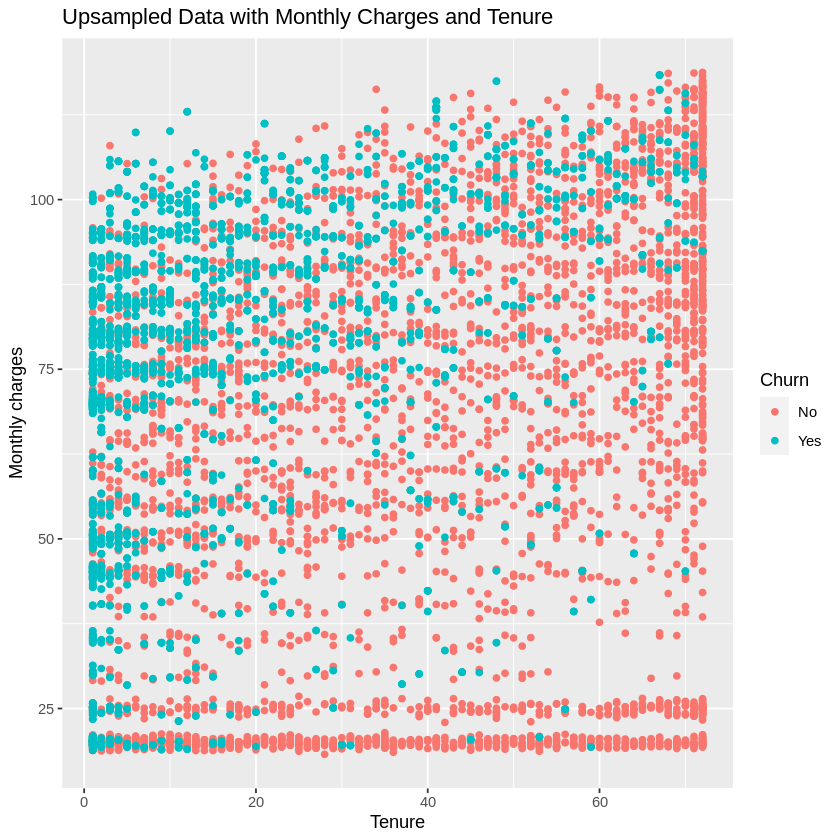

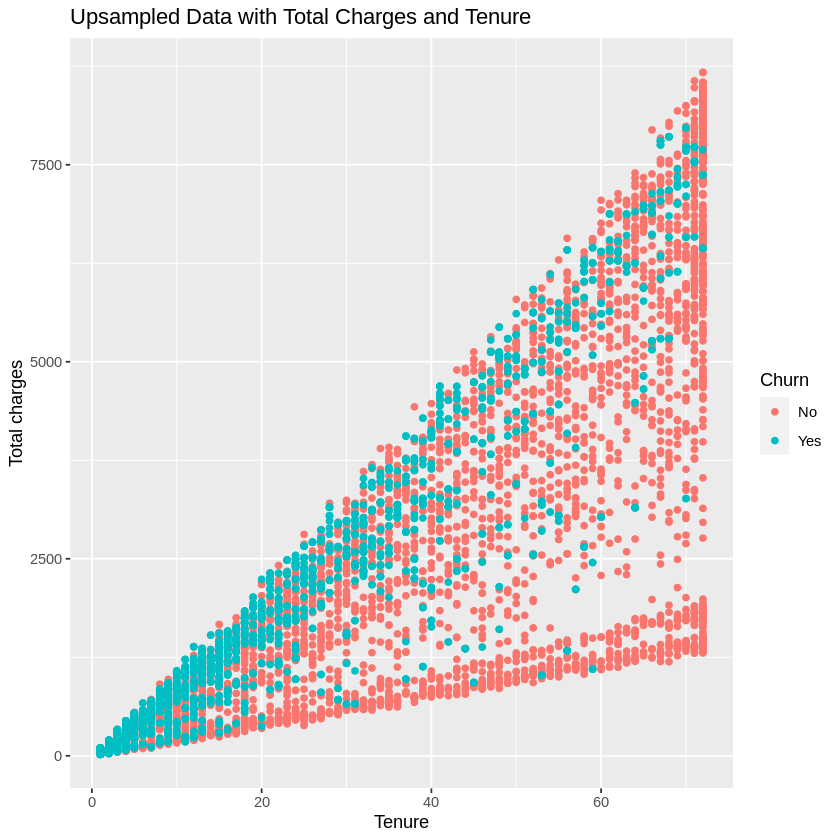

In [13]:
#Plotting the distributions for the new upsampled data, using the predictor variables as x and y axis

new_upsample_telecom_train_plot <- new_upsample_telecom_train |>
                                ggplot(aes(x=tenure, y = MonthlyCharges, color=Churn))+
                                geom_point()+
                                xlab("Tenure") +
                                ylab("Monthly charges") +
                                ggtitle("Upsampled Data with Monthly Charges and Tenure")

new_upsample_telecom_train_plot 

new_upsample_telecom_train_plot2 <- new_upsample_telecom_train |>
                                ggplot(aes(x=tenure, y = TotalCharges, color=Churn))+
                                geom_point()+
                                xlab("Tenure") +
                                ylab("Total charges")+
                                ggtitle("Upsampled Data with Total Charges and Tenure")
new_upsample_telecom_train_plot2

#I added titles for these graphs but I'm not 100% sure they're accurate titles pls check and then remove this comment -Inshal

Then, we compute the means for each of the predictor variables using the new, upsampled dataset. 

In [6]:
mean_tenure <- new_upsample_telecom_train |>    
               summarize(mean=mean(tenure))

mean_tenure

mean_monthly_charges <-  new_upsample_telecom_train |>    
                         summarize(mean=mean(MonthlyCharges))

mean_monthly_charges


mean_total_charges <-  new_upsample_telecom_train |>    
                         summarize(mean=mean(TotalCharges))

mean_total_charges



mean
<dbl>
27.66015


mean
<dbl>
67.82672


mean
<dbl>
2031


We can also compute the standard deviations for the 3 predictor variables. 

In [14]:
#we should probably write a reasoning for why we are computing the means and standard deviations - Inshal

sd_tenure <- new_upsample_telecom_train |>    
               summarize(sd=sd(tenure))

sd_tenure

sd_monthly_charges <-  new_upsample_telecom_train |>    
                         summarize(sd=sd(MonthlyCharges))

sd_monthly_charges


sd_total_charges <-  new_upsample_telecom_train |>    
                         summarize(sd=sd(TotalCharges))

sd_total_charges

sd
<dbl>
23.90745


sd
<dbl>
28.66851


sd
<dbl>
2167.436


To build the predictor using the new upsampled training dataset, we use the knn-classification model. We first set the seed so that our analysis is reproducible. In this case, we set the seed to 1234. The next step involves  turning the number of neighbours to determine the k-value that provides for the highest accuracy. All the predictors are be included in the recipe, and then the 5-fold cross-validation method is used. Next, all the components are put into a workflow, with a grid value of 50. The metrics for accuracy estimates are returned. 

In [8]:
set.seed(1234)

knn_spec<-nearest_neighbor(weight_func="rectangular",neighbor=tune())|>
          set_engine("kknn")|>
          set_mode("classification")

telecom_recipe<-recipe(Churn~.,data=new_upsample_telecom_train)|>
                step_scale(all_predictors())|>
                step_center(all_predictors()) 

telecom_vfold<-vfold_cv(new_upsample_telecom_train,v=5,strata=Churn)

telecom_workflow<-workflow()|>
                  add_recipe(telecom_recipe)|>
                  add_model(knn_spec)|>
                  tune_grid(resamples=telecom_vfold,grid=50)|>
                  collect_metrics()


telecom_workflow

filtered_telecom_metrics<-telecom_workflow|>
                         filter(.metric=="accuracy")

filtered_telecom_metrics


print(filtered_telecom_metrics)

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.8425660,5,0.002925296,Preprocessor1_Model01
1,roc_auc,binary,0.8425660,5,0.002925296,Preprocessor1_Model01
2,accuracy,binary,0.8423082,5,0.003091599,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
14,roc_auc,binary,0.8311502,5,0.002491207,Preprocessor1_Model14
15,accuracy,binary,0.7515546,5,0.002397540,Preprocessor1_Model15
15,roc_auc,binary,0.8315329,5,0.002250234,Preprocessor1_Model15


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.8425660,5,0.002925296,Preprocessor1_Model01
2,accuracy,binary,0.8423082,5,0.003091599,Preprocessor1_Model02
3,accuracy,binary,0.7831452,5,0.003829741,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
13,accuracy,binary,0.7505186,5,0.003963387,Preprocessor1_Model13
14,accuracy,binary,0.7507770,5,0.004278109,Preprocessor1_Model14
15,accuracy,binary,0.7515546,5,0.002397540,Preprocessor1_Model15


# A tibble: 15 × 7
   neighbors .metric  .estimator  mean     n std_err .config              
       <int> <chr>    <chr>      <dbl> <int>   <dbl> <chr>                
 1         1 accuracy binary     0.843     5 0.00293 Preprocessor1_Model01
 2         2 accuracy binary     0.842     5 0.00309 Preprocessor1_Model02
 3         3 accuracy binary     0.783     5 0.00383 Preprocessor1_Model03
 4         4 accuracy binary     0.783     5 0.00363 Preprocessor1_Model04
 5         5 accuracy binary     0.768     5 0.00252 Preprocessor1_Model05
 6         6 accuracy binary     0.768     5 0.00252 Preprocessor1_Model06
 7         7 accuracy binary     0.761     5 0.00393 Preprocessor1_Model07
 8         8 accuracy binary     0.761     5 0.00378 Preprocessor1_Model08
 9         9 accuracy binary     0.751     5 0.00179 Preprocessor1_Model09
10        10 accuracy binary     0.752     5 0.00179 Preprocessor1_Model10
11        11 accuracy binary     0.746     5 0.00282 Preprocessor1_Model11
12    

We then plot a line graph for accuracy estimates in order to determine which K-value provides for highest accuracy.

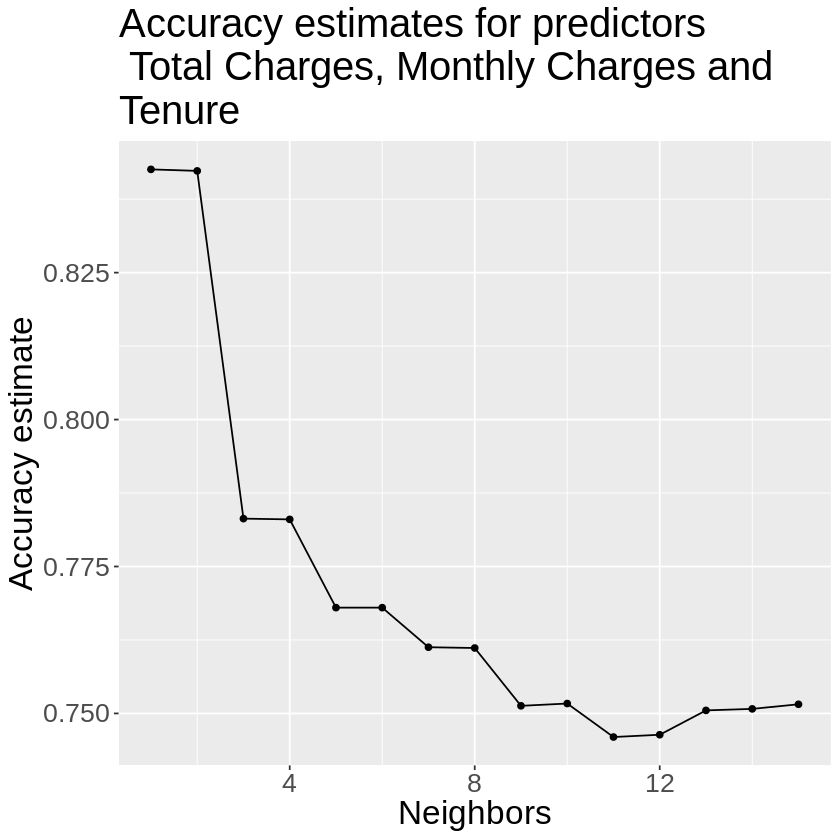

In [16]:
telecom_k_graph<-filtered_telecom_metrics|>
                 ggplot(aes(x=neighbors,y=mean))+
                 geom_point()+
                 geom_line()+
                 labs(x="Neighbors",y="Accuracy estimate")+
                 ggtitle("Accuracy estimates for predictors \n Total Charges, Monthly Charges and \nTenure")+
                 theme(text=element_text(size=20))

telecom_k_graph

Given the graph, it seems that 1 and 2 both provide for about the same accuracy. However, 2 is a better K-value to use--as compared to 1--simply because it helps us better avoid the effects of underfitting. Thus, we will include K = 2 parameter into the spec function. Next, we use the predictions function to apply our predictor to the test dataset. In order to ascertain how well the predictor is working, we look at its metrics as well as its confusion matrix. 

In [17]:
knn_spec_1<-nearest_neighbor(weight_func="rectangular",neighbor=2)|>
          set_engine("kknn")|>
          set_mode("classification")

telecom_workflow_1<-workflow()|>
                    add_recipe(telecom_recipe)|>
                    add_model(knn_spec_1)|>
                    fit(new_upsample_telecom_train)
                             
telecom_test_predictions<-predict(telecom_workflow_1,telecom_test)|>
                          bind_cols(telecom_test)
                             
telecom_test_metrics<-telecom_test_predictions|>
                       metrics(truth=Churn,estimate=.pred_class)|>
                       filter(.metric=="accuracy")
                             
telecom_test_conf_mat<-telecom_test_predictions|>
                       conf_mat(truth=Churn,estimate=.pred_class)
                             
telecom_test_metrics
telecom_test_conf_mat
                  

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9243458


          Truth
Prediction   No  Yes
       No  1253   71
       Yes   62  372

Discussion

[insert discussion here]

References

BlastChar. “Telco Customer Churn.” Kaggle, 23 Feb. 2018, https://www.kaggle.com/datasets/blastchar/telco-customer-churn. 

Hashmi, Nabgha, Naveed Anwer Butt, and Muddesar Iqbal. "Customer churn prediction in telecommunication a decade review and classification." International Journal of Computer Science Issues (IJCSI) 10.5 (2013): 271.

K. Dahiya and S. Bhatia, "Customer churn analysis in telecom industry," 2015 4th International Conference on Reliability, Infocom Technologies and Optimization (ICRITO) (Trends and Future Directions), Noida, India, 2015, pp. 1-6, doi: 10.1109/ICRITO.2015.7359318.